## Assignment 2: Exploratory Data Analysis and Visualization
### Exploring Gender Diversity in Universities
--- 


The dataset to be used for the project is the [World University Rankings 2023](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023) Dataset sourced from Kaggle. This data was collected by Syed Ali Taqi, who used Python to scrape data from the web, manipulate it and compile it into a meaningful form. In this dataset, we have 13 different variables and 2341 observations (before the removal of NAs). Below is a description of all the variables. 
<br><br>

| | Variable | Variable Type | Description |
|---| -------- | ------- | --- |
|1| University rank  | chr  |Rank of specific university all over the world|
|2| University name | chr    |Specific name of University|
|3| Location | chr |Physical place where university exists|
|4| No. of students | chr |Present number of students enrolled in university as of 2023|
|5| No. of students per staff |dbl |Number of students under one Professor|
|6| International students |chr  |Total number of International Students|
|7| Female : male ratio |chr  |A ratio of female to male students respectively|
|8| Overall score | chr | The combined weighted scores of those given below. Out of 100|
|9| Teaching score | chr |The percieved prestige of the institution based on the Academic Reputation Survey. Out of 100.|
|10| Research score | chr |Reputation for research excellence amongst peers based on the Academic Reputation Survey. Out of 100|
|11| Citations score | chr |The number of citations received by a journal in one year to documents published in the three previous years, divided by the number of documents indexed in Scopus published in those same three years. Out of 100.|
|12| Industry income score | chr |How much money a university receives from the working industry in exchange for its academic expertise. Out of 100|
|13| International outlook score | chr |The ability of a university to attract undergraduates, postgraduates and faculty from all over the globe.|


<br><br>
The dataset will be used to answer the question **Does a university's location and student body makeup influence the number of female students?** We will explore the relationship between international and female students at universities and investigate whether there are any regional variations in this relationship. This research question aims at inference, seeking to identify the demographic factors that impact the gender balance of students.  
<br>
Regarding hypotheses, we will test the following:

**Null Hypothesis ($H_0$):** Regions with a large number of international students do not have a large number of female students.

**Alternative Hypothesis ($H_1$):** Regions with a large number of international students have a large number of female students.

<br>
    Though the dataset contains many variables, these were chosen for their theoretical relevance to the research question. Geographical location influences cultural, social, and economic factors that can impact gender dynamics in student populations. Similarly, the presence of international students contributes to diversity on campus, potentially influencing female enrollment rates. Using just these will also allow for a comprehensive, in depth understanding of their relationships without risk of creating overcomplicated models or using data with hidden correlations. 
<br><br>

Before conducting inference, we will perform Exploratory Data Analysis (EDA) to gain insights about the dataset. This will involve reading in the data, cleaning, and wrangling it into a tidy format, and generating summary statistics and visualizations. The visualization below (**Figure 1**) provides a clear demonstration of the relationship between the total number of female students (pink) and international students (green) by region. Upon examination, regions with the highest number of international students, such as the European Union and North America, also tend to have the highest number of female students. Conversely, the region with lowest numbers of international students, the Caribbean, has the second lowest number of female students. This suggests a potential relationship worth exploring further between the variables of interest.
<br><br>


<div style="text-align:center;">
    <img src="Female_vs_International.png" width="800" height="900" alt="combined_bar" style="padding: 0;">
    <figcaption style="text-align: center; font-size: 16px; font-weight: bold; position: absolute; top: 0; left: 0; right: 0; margin-left: auto; margin-right: auto;">Figure 1: Combined Bar Chart Showing the Total International and Female students for each Region.</figcaption>
</div>

<br>

---
### Code

<br>

In [1]:
# install libraries
library(tidyverse)
library(dplyr)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(cowplot)

raw_data <- read.csv("world_university_rankings_2023.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
# check how many rows have missing data
na_count <- nrow(raw_data) - sum(complete.cases(raw_data))
# na_count

# remove rows with missing data, select columns of interest
filtered <- raw_data %>%
    filter(!is.na(International.Student)) %>%    # remove rows with n/a values for international count
    filter(!(Female.Male.Ratio == "n/a")) %>%    # remove rows with n/a values for the ratio
    filter(!(University.Rank == "Reporter")) %>% # remove rows where the rank is reporter
    select("Name.of.University","Location","No.of.student",
           "International.Student","Female.Male.Ratio")

# rename columns
col_names <- c("name","location","num_students", "pct_international", "f_to_m_ratio")  
colnames(filtered) <- col_names 

# separating the column f_to_m_ratio into two columns 
filtered <- separate(filtered, f_to_m_ratio, into = c("pct_female", "pct_male"), sep = " : ")  

# convert chr columns to numeric
filtered$pct_female <- as.numeric(filtered$pct_female) 
filtered$pct_male <- as.numeric(filtered$pct_male)  

# convert location column to factor
filtered$location <- as.factor(filtered$location)

filtered_loc <- filtered %>%
        filter(!(location == "n/a"))

In [3]:
# approximate the number of international students and students of each gender, to 0 decimal places 
est_int_per_gender <- filtered_loc %>% 
        mutate(approx_int = (num_students * (pct_international/100)) %>% round(0)) %>%
        mutate(approx_int_fem = (num_students * (pct_international/100) * (pct_female/100))%>% round(0))%>%
        mutate(approx_int_male = (num_students * (pct_international/100) * (pct_male/100)) %>% round(0))%>%
        mutate(approx_fem = (num_students * (pct_female/100)) %>% round(0)) %>%
        mutate(approx_male = (num_students * (pct_male/100)) %>% round(0))

In [4]:
# define regions of the world
n_africa <- c("Algeria", "Egypt", "Morocco", "Tunisia") 
s_africa <- c("Botswana", "Namibia", "South Africa")
e_africa <- c("Ethiopia", "Kenya", "Uganda", "Mozambique", "Zambia", "Tanzania", "Zimbabwe",  "Mauritius")
w_africa <- c("Ghana", "Nigeria")

caribbean <- c("Jamaica", "Cuba", "Puerto Rico")

n_america <- c("Canada", "United States")
c_america<- c("Costa Rica", "Mexico") 
s_america <- c("Argentina", "Brazil", "Chile", "Colombia", "Ecuador", "Peru", "Venezuela")

europe <- c("Croatia", "Montenegro", "Iceland", "Norway", "Serbia", "Switzerland", "Ukraine", 
            "United Kingdom")
eu <- c("Austria", "Belgium", "Bulgaria", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", 
        "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", 
        "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden")

middle_east <- c("Iran", "Israel", "Jordan", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates")

oceania <- c("Australia", "Fiji", "New Zealand")

c_asia    <- c("Kazakhstan") 
s_asia <- c("Sri Lanka", "Bangladesh", "India", "Pakistan", "Nepal")
se_asia  <- c("Brunei", "Brunei Darussalam", "Indonesia", "Malaysia", "Philippines", "Singapore", 
              "Thailand", "Vietnam")
e_asia <- c("China", "South Korea", "Japan", "Hong Kong", "Taiwan")
w_asia  <- c("Georgia", "Azerbaijan", "Turkey", "Northern Cyprus", "Lebanon", "Iraq")


In [5]:
# assign each university to a region
est_int_per_gender$region <- NA

est_int_per_gender <- est_int_per_gender %>%
  mutate(region = case_when(
      location %in% n_africa ~ "Northern Africa" , 
      location %in% s_africa ~ "Southern Africa" ,
      location %in% e_africa ~ "Eastern Africa" ,
      location %in% w_africa ~ "Western Africa" ,
      location %in% caribbean ~ "Caribbean" ,
      location %in% n_america ~ "North America" ,
      location %in% c_america ~ "Central America" ,
      location %in% s_america ~ "South America" ,
      location %in% europe ~ "Europe" ,
      location %in% eu ~ "European Union" ,
      location %in% middle_east ~ "Middle East" ,
      location %in% oceania ~ "Oceania" ,
      location %in% c_asia ~ "Central Asia" ,
      location %in% s_asia ~ "South Asia" ,
      location %in% se_asia ~ "Southeast Asia" ,
      location %in% e_asia ~ "East Asia" ,
      location %in% w_asia ~ "West Asia" ,
      TRUE                  ~ NA_character_ 
  ))

In [6]:
# calculate the number of international, female and all students per region
region_stats <- est_int_per_gender %>%
        group_by(region) %>%
        summarise(sum_international = sum(approx_int), sum_female = sum(approx_fem), total_students = sum(num_students)) 

In [7]:
 # Plot for international students
plot_international <- ggplot(region_stats, aes(x = region, y = sum_international, fill = "International"))+
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum_international), 
            vjust = 0, size = 4, color = "black") + # Add text annotations for y-values
  scale_fill_manual(values = "lightgreen") +  # Set color for international bars
  labs(y = "# International Students") +
  scale_y_continuous(limits = c(0, max(region_stats$sum_female))) +
  theme(legend.position = "none",
        text = element_text(size = 20),
        plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 90, hjust = 0, size =12),
        axis.title.x = element_blank(), # Remove x-axis title
        axis.text.x.top = element_text(size = 15),
        axis.text.y = element_blank(),   # Remove x-axis text 
        axis.title.y = element_text(hjust = 0.2),
        axis.ticks.length = unit(0, "cm"),
        panel.background = element_rect(fill = "white")
  ) 

# plot for female students
plot_female <- ggplot(region_stats, aes(x = region, y = sum_female, fill = "Female")) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum_female),  
            vjust = 1, size = 4, color = "black") +  # Add text annotations for y-values
  scale_fill_manual(values = "lightpink") +  # Set color for female bars
  labs(y = "# Female Students") +
  theme(legend.position = "none",
        text = element_text(size = 20),
        plot.title = element_text(hjust = 0.5),
        axis.text.x = element_blank(),   # Remove x-axis text  
        axis.title.x = element_blank(),  # Remove x-axis title
        axis.text.y = element_blank(),   # Remove x-axis text 
        axis.title.y = element_text(hjust = 0.8),
        axis.ticks.length = unit(0, "cm"),  # Remove axis ticks
        panel.background = element_rect(fill = "white")
  )  + scale_y_reverse()

# put plots together
options(repr.plot.width = 12, repr.plot.height = 20) 
combo_plot <- plot_grid(plot_international,plot_female, nrow = 2)
ggsave("Female_vs_International.png", combo_plot, width = 12, height = 15)

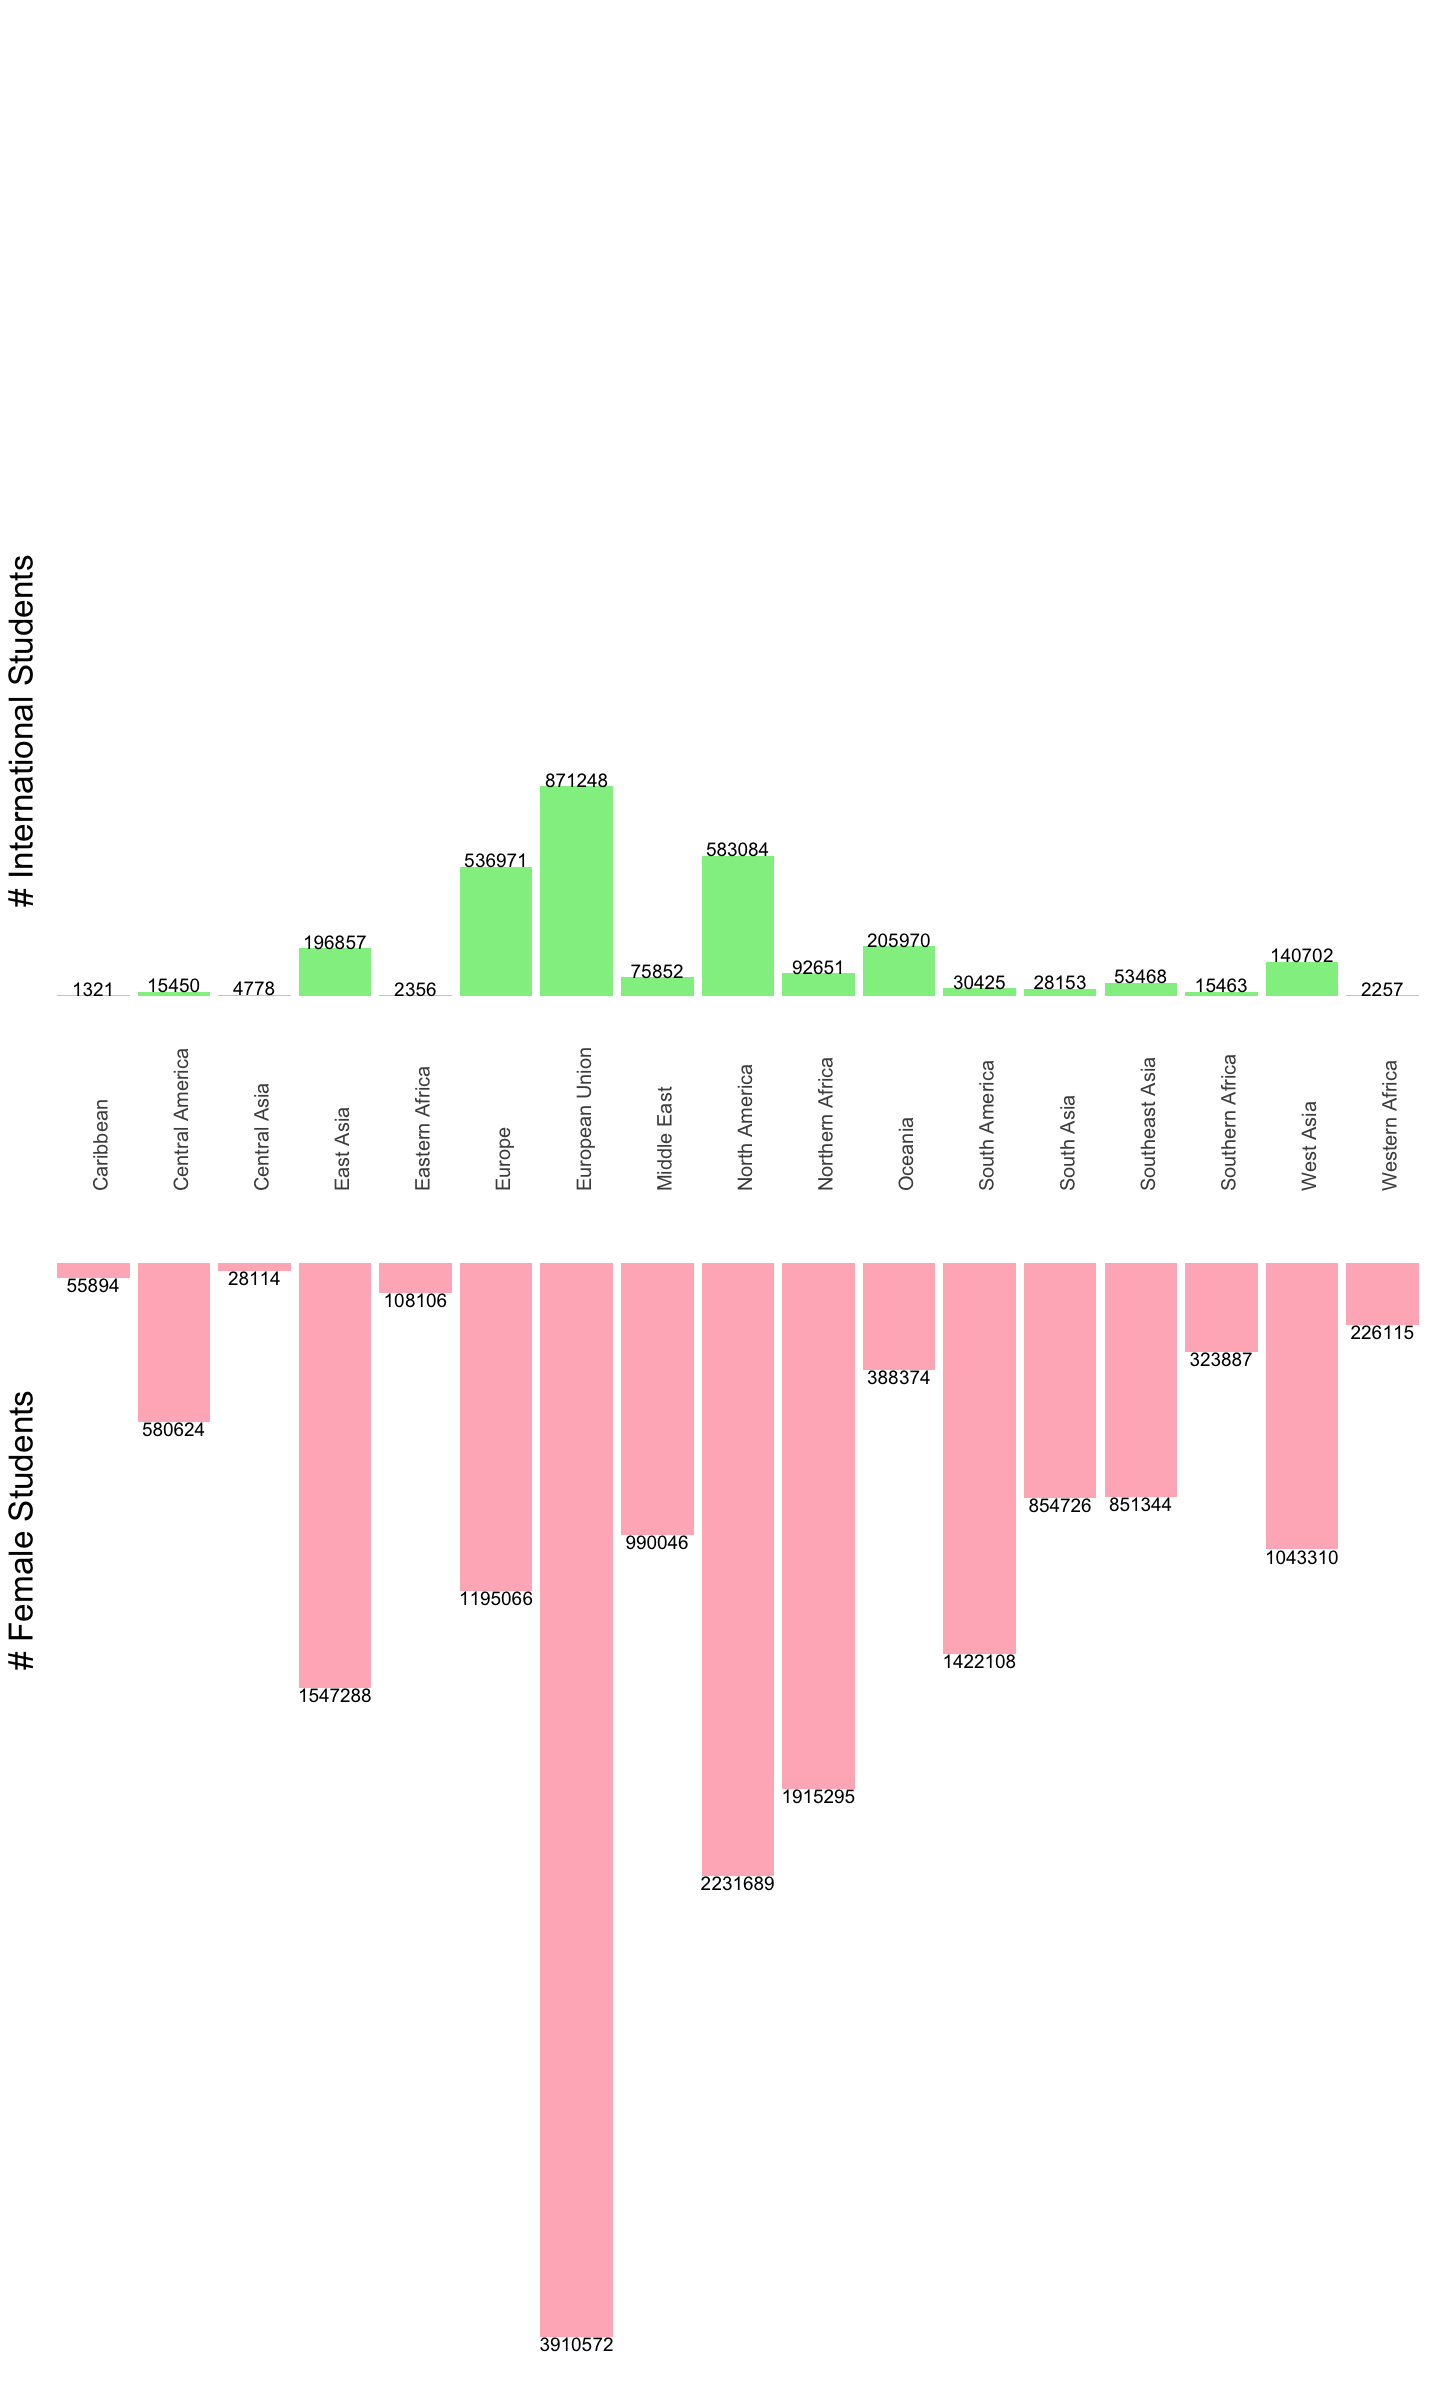

In [8]:
combo_plot